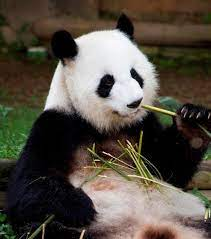

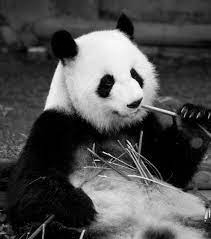

(239, 211)


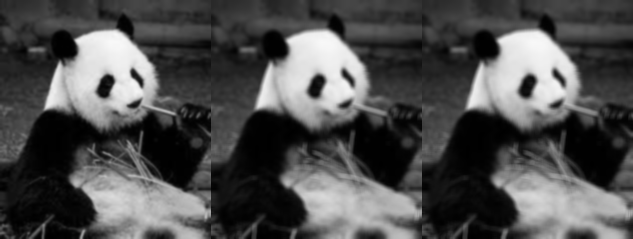

In [ ]:
## Smoothning of iamge by Gaussian
## Effect of Sigma on image
## please upload panda.jpg before proceeding
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/panda.jpg"
col_img = cv2.imread(img_path)
cv2_imshow(col_img) 
bnw_img = cv2.cvtColor(col_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(bnw_img) 
print(bnw_img.shape)

# Define a list of sigma values
sigma_values = [1, 3, 5]
img_list = []

# Apply Gaussian smoothing for each sigma value
for sigma in sigma_values:
    ksize = (5, 5)  # Kernel size (width, height)
    smoothed_image = cv2.GaussianBlur(bnw_img, ksize, sigma)
    img_list.append(smoothed_image)

smooth_img = np.concatenate((img_list[0], img_list[1], img_list[2]), axis=1)
cv2_imshow(smooth_img)



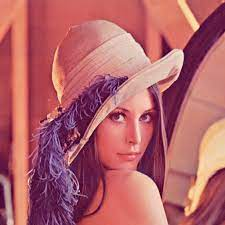

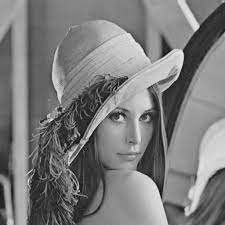

(225, 225)
magnitude calculated using sobel operator with k-size 1 , 3, 5


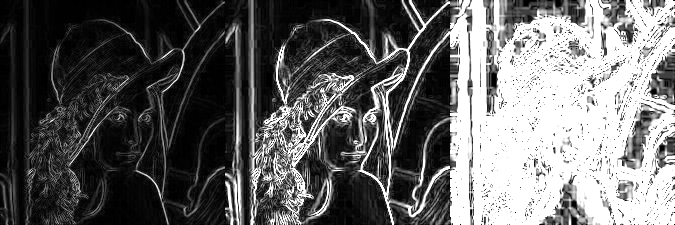

Canny filtered image


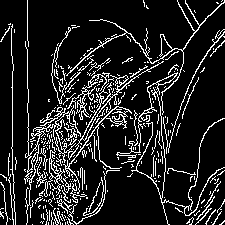

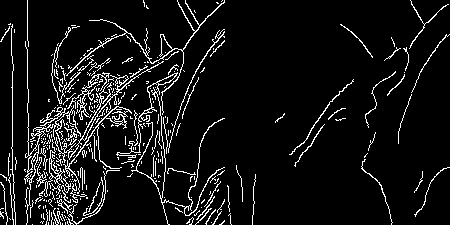

In [9]:
## Canny edge detector on Lena
## please upload lena.jpg before proceeding

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/lena.jpg"
col_img = cv2.imread(img_path)
cv2_imshow(col_img) 
bnw_img = cv2.cvtColor(col_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(bnw_img) 
print(bnw_img.shape)

print("magnitude calculated using sobel operator with k-size 1 , 3, 5")
## magnitude 
# Calculate the horizontal and vertical finite difference using the Sobel operator
dx_1 = cv2.Sobel(bnw_img,cv2.CV_64F,1,0,ksize = 1)
dy_1 = cv2.Sobel(bnw_img,cv2.CV_64F,0,1,ksize = 1)
# Calculate the magnitude and direction of the gradient
magnitude_1 = np.sqrt(dx_1**2 + dy_1**2)
direction_1 = np.arctan2(dy_1, dx_1)

dx_2 = cv2.Sobel(bnw_img,cv2.CV_64F,1,0,ksize = 3)
dy_2 = cv2.Sobel(bnw_img,cv2.CV_64F,0,1,ksize = 3)
# Calculate the magnitude and direction of the gradient
magnitude_2 = np.sqrt(dx_2**2 + dy_2**2)
direction_2 = np.arctan2(dy_2, dx_2)


dx_3 = cv2.Sobel(bnw_img,cv2.CV_64F,1,0,ksize = 5)
dy_3 = cv2.Sobel(bnw_img,cv2.CV_64F,0,1,ksize = 5)
# Calculate the magnitude and direction of the gradient
magnitude_3 = np.sqrt(dx_3**2 + dy_3**2)
direction_3 = np.arctan2(dy_3, dx_3)


magnitude = np.concatenate((magnitude_1, magnitude_2, magnitude_3), axis=1)
cv2_imshow(magnitude)

threshold_value, _ = cv2.threshold(bnw_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Canny filtered image")
# Using Canny filter to extract edges
edges = cv2.Canny(bnw_img, 0.75 * threshold_value, threshold_value)
smooth_Lena = cv2.GaussianBlur(bnw_img, ksize, 4)
smooth_edges = cv2.Canny(smooth_Lena, 0.75 * threshold_value, threshold_value)

edge_detect = np.concatenate((edges, smooth_edges), axis=1)
cv2_imshow(edges) 
cv2_imshow(edge_detect) 

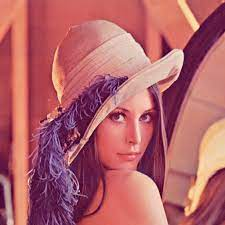

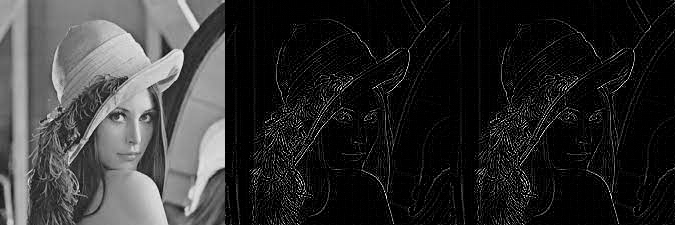

In [17]:
## Laplacian Edge detection
## please upload lena.jpg before proceeding

import numpy as np
import cv2
from google.colab.patches import cv2_imshow


img_path = "/content/lena.jpg"
col_img = cv2.imread(img_path)
cv2_imshow(col_img) 
bnw_img = cv2.cvtColor(col_img,cv2.COLOR_BGR2GRAY)

## Gaussian Filter 
ksize = (1,1)  # Kernel size (width, height)
smooth_Lena = cv2.GaussianBlur(bnw_img, ksize, 2)

x,y = smooth_Lena.shape
laplacian_bnw_lena = cv2.Laplacian(bnw_img, cv2.CV_64F, ksize=1)
laplacian_smooth_lena = cv2.Laplacian(smooth_Lena, cv2.CV_64F, ksize=1)
ori_smooth = np.concatenate((bnw_img, laplacian_bnw_lena,laplacian_smooth_lena), axis=1)
cv2_imshow(ori_smooth)